<a href="https://colab.research.google.com/github/pokeychip19946/python-basics/blob/master/Day_9_MNIST_Hand_Written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.keras as tf
import numpy
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.datasets.mnist
#mnist = tf.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

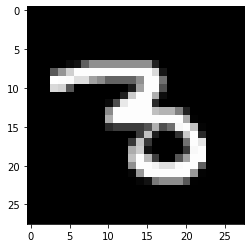

In [ ]:
plt.imshow(xtrain[30],cmap='gray')
plt.show()

In [ ]:
ytrain[30]

3

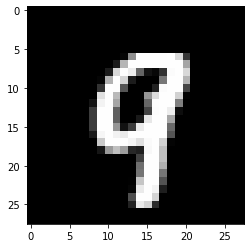

In [ ]:
plt.imshow(xtrain[800],cmap='gray')
plt.show()

In [ ]:
ytrain[59999]

8

In [ ]:
### Creating the model
model = tf.models.Sequential()
### Create the layers
model.add(tf.layers.Flatten())   ## input layer
model.add(tf.layers.Dense(784,activation="relu"))    ## hidden layer(28*28)
model.add(tf.layers.Dense(10,activation="softmax"))

In [ ]:
### Compile/Configure the model
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
### Scale the data
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
### Train the model
model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1875 - accuracy: 0.9442
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9771
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9845
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9931
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - accuracy: 0.9947
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0137 - accuracy: 0.9955
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

In [ ]:
ypred = model.predict(xtest)   ### testing

In [ ]:
ytest[600]

6

In [ ]:
ypred[600]

array([4.3904845e-21, 8.4410439e-23, 5.3496365e-15, 7.0936645e-22,
       2.1746200e-18, 4.1520871e-14, 1.0000000e+00, 4.4669410e-23,
       2.2362003e-13, 5.5846196e-23], dtype=float32)

In [ ]:
numpy.argmax(ypred[600])

6

In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9814


[0.10967742651700974, 0.9814000129699707]

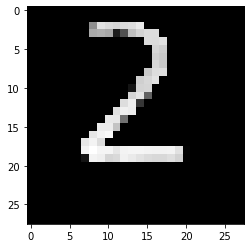

In [ ]:
import cv2
img = cv2.imread('a.png',0)
img = cv2.bitwise_not(img)
img = cv2.resize(img,(28,28))
img = img/255
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
import numpy as np
ypred = model.predict(np.array([[img]])) 

In [ ]:
np.argmax(ypred)

2